In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (9, 5)

In [3]:
sns.set()

In [4]:
df_learning_curves = pd.read_csv('updnet_learning_curves.csv')

<IPython.core.display.Javascript object>


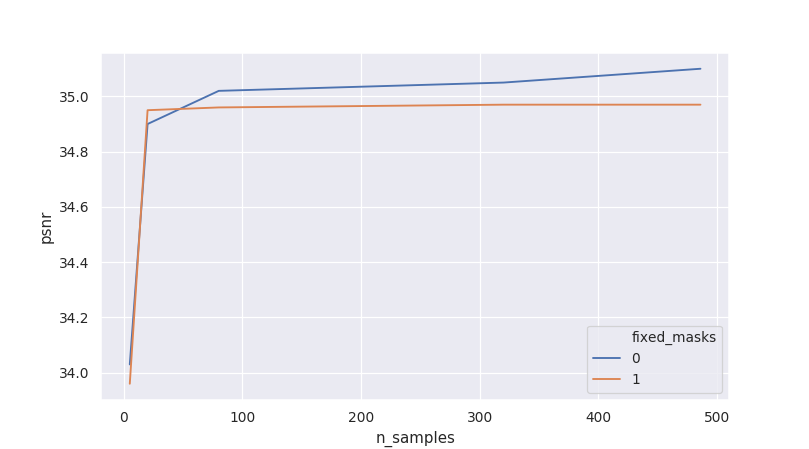

In [5]:
plt.figure()
sns.lineplot(data=df_learning_curves, x='n_samples', y='psnr', hue='fixed_masks')
plt.savefig('updnet_learning_curves.png')

In [6]:
df_n_params = pd.read_csv('n_params_model.csv', index_col=0)
df_denoising_res = pd.read_csv('denoising_results_None.csv', index_col=0)
df_denoising_res_didn = pd.read_csv('denoising_results_None_DIDN.csv', index_col=0)

In [7]:
df_denoising_res[df_denoising_res['model_name'] == 'DIDN'] = df_denoising_res_didn.values

In [8]:
df_denoisers = df_denoising_res.merge(df_n_params, on=['model_name', 'model_size'])

In [9]:
df_denoisers['model_denomination'] = df_denoisers[['model_name', 'model_size']].agg('-'.join, axis=1)

<IPython.core.display.Javascript object>


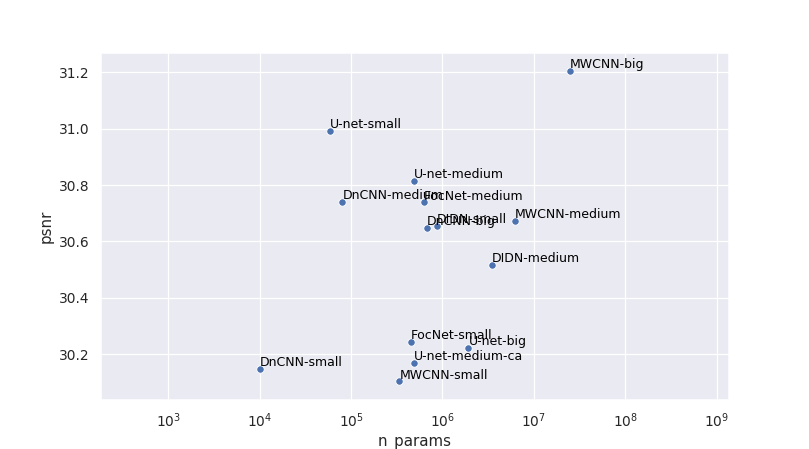

In [10]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='psnr', data=df_denoisers)
for line in range(0, df_denoisers.shape[0]):
    p.text(
        df_denoisers.n_params[line], 
        df_denoisers.psnr[line]+0.01, 
        df_denoisers.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

In [11]:
df_reconstruction = pd.read_csv('reconstruction_results_None.csv', index_col=0)
# df_reconstruction_didn = pd.read_csv('reconstruction_results_None_DIDN.csv', index_col=0)
# df_reconstruction[df_reconstruction['model_name'] == 'DIDN'] = df_reconstruction_didn.values
df_reconstruction['psnr_recon'] = df_reconstruction['psnr']
df_reconstruction = df_reconstruction.drop('psnr', axis=1)
df_reconstruction['ssim_recon'] = df_reconstruction['ssim']
df_reconstruction = df_reconstruction.drop('ssim', axis=1)

In [12]:
df_all = df_denoisers.merge(df_reconstruction, on=['model_name', 'model_size'])

In [13]:
df_all

,model_name,model_size,psnr,ssim,n_params,model_denomination,psnr_recon,ssim_recon
0,DIDN,medium,30.516462,0.688713,3450848,DIDN-medium,35.181260,0.837218
1,DIDN,small,30.654343,0.698549,865264,DIDN-small,35.091831,0.835335
2,DnCNN,big,30.647631,0.690485,677450,DnCNN-big,34.947011,0.833006
3,DnCNN,medium,30.740580,0.695892,80362,DnCNN-medium,34.843274,0.831748
4,DnCNN,small,30.149007,0.666011,10154,DnCNN-small,34.413519,0.825539
5,FocNet,medium,30.738389,0.704886,621698,FocNet-medium,35.210394,0.837451
6,FocNet,small,30.243096,0.671932,455674,FocNet-small,35.047057,0.835027
7,MWCNN,big,31.203525,0.713605,24932746,MWCNN-big,35.235768,0.837658
8,MWCNN,medium,30.673719,0.691842,6217930,MWCNN-medium,35.110500,0.835500
9,MWCNN,small,30.104372,0.670601,338122,MWCNN-small,35.180771,0.836993


<IPython.core.display.Javascript object>


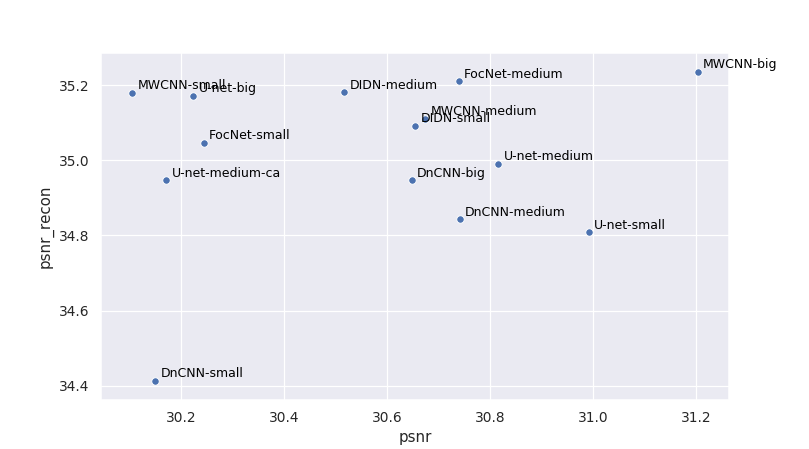

In [14]:
plt.figure()
p = sns.scatterplot(x='psnr', y='psnr_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.psnr[line]+0.01, 
        df_all.psnr_recon[line]+0.01, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

<IPython.core.display.Javascript object>


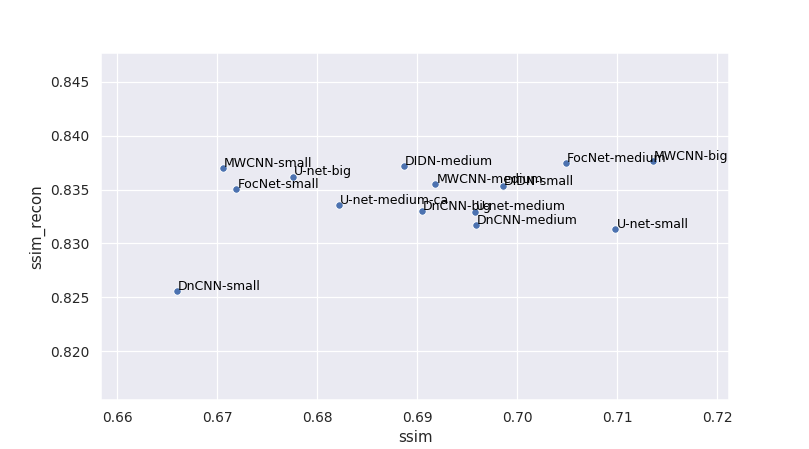

In [19]:
plt.figure()
p = sns.scatterplot(x='ssim', y='ssim_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.ssim[line]+0.0001, 
        df_all.ssim_recon[line]+0.0001, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

<IPython.core.display.Javascript object>


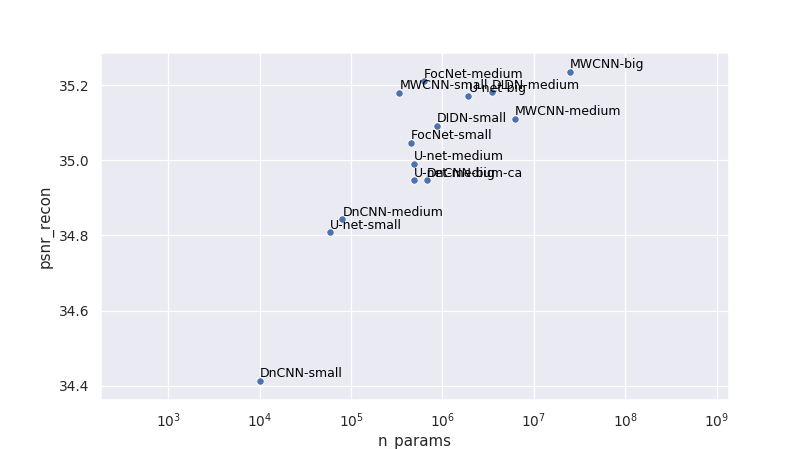

In [17]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='psnr_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.n_params[line], 
        df_all.psnr_recon[line]+0.01, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

<IPython.core.display.Javascript object>


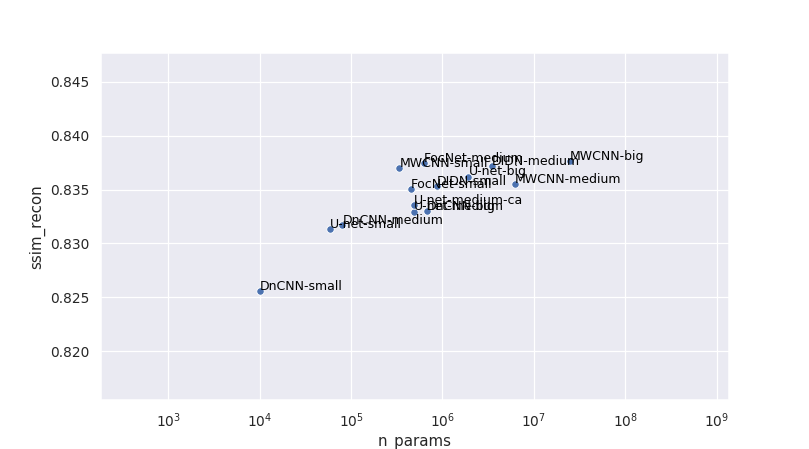

In [20]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='ssim_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.n_params[line], 
        df_all.ssim_recon[line]+0.0001, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )